In [1]:
import torch
from PIL import Image
from torchvision import models
from torchvision import transforms

from IPython.display import display 

## Pretrained Models

In [23]:
#dir(models) #Uncomment to view the models

## Image to Classify 

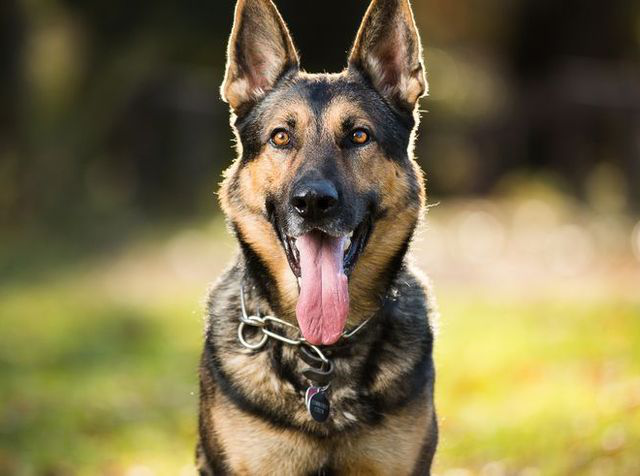

In [3]:
img = Image.open("/home/pratik/dog-classifier/project-1/uploaded_images/dog.jpg")
display(img)

## Preprocessing

In [4]:
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

In [5]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

## Image Net Classes Labels

In [6]:
with open("/home/pratik/ml_workspace/dog_classifer/imagenet1000_clsid_to_human.txt") as f:
    labels = [line.strip() for line in f.readlines()]

## VGG 16

In [7]:
vgg = models.vgg16(pretrained = True)

In [8]:
vgg.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [9]:
out = vgg(batch_t)
#out

In [10]:
_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

In [11]:
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[("235: 'German shepherd, German shepherd dog, German police dog, alsatian',",
  98.64995574951172),
 ("225: 'malinois',", 1.1634352207183838),
 ("227: 'kelpie',", 0.1304812878370285),
 ("174: 'Norwegian elkhound, elkhound',", 0.01953425444662571),
 ("465: 'bulletproof vest',", 0.018906615674495697)]

## ResNet

In [13]:
resnet = models.resnet101(pretrained = True)

In [14]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [15]:
out_resnet = resnet(batch_t)

In [16]:
_, indices_r = torch.sort(out_resnet, descending=True)
percentage_r = torch.nn.functional.softmax(out_resnet, dim=1)[0] * 100

In [17]:
[(labels[idx], percentage_r[idx].item()) for idx in indices_r[0][:5]]

[("235: 'German shepherd, German shepherd dog, German police dog, alsatian',",
  99.37176513671875),
 ("225: 'malinois',", 0.5257430076599121),
 ("227: 'kelpie',", 0.053163930773735046),
 ("465: 'bulletproof vest',", 0.01457771472632885),
 ("174: 'Norwegian elkhound, elkhound',", 0.009862720966339111)]

## AlexNet

In [18]:
alex = models.alexnet(pretrained = True)

In [19]:
alex.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [20]:
out_alex = alex(batch_t)

In [21]:
_, indices_a = torch.sort(out_alex, descending=True)
percentage_a = torch.nn.functional.softmax(out_alex, dim=1)[0] * 100

In [27]:
[(labels[idx], percentage_a[idx].item()) for idx in indices_a[0][:5]]

[("235: 'German shepherd, German shepherd dog, German police dog, alsatian',",
  90.56141662597656),
 ("225: 'malinois',", 9.242488861083984),
 ("227: 'kelpie',", 0.18339787423610687),
 ("174: 'Norwegian elkhound, elkhound',", 0.010389294475317001),
 ("236: 'Doberman, Doberman pinscher',", 0.0005230024689808488)]